<a href="https://colab.research.google.com/github/zoro1543/Data-Science-Portfolio/blob/main/zee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
palette = sns.color_palette("crest", as_cmap=True)
colors  = palette.colors

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 5)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
movies = pd.read_fwf('/content/drive/MyDrive/Data/zee-movies.dat', encoding='ISO-8859-1',header=None)
users = pd.read_fwf('/content/drive/MyDrive/Data/zee-users.dat', encoding='ISO-8859-1',header=None)
ratings = pd.read_fwf('/content/drive/MyDrive/Data/zee-ratings.dat', encoding='ISO-8859-1',header=None)

In [6]:
movies.head()

,0,1,2
0,Movie ID::Title::Genres,NaN,NaN
1,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
2,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
3,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
4,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN


In [7]:
movies.shape

(3884, 3)

In [8]:
movie_columns = movies.iloc[0,0].split('::')
movies = movies.iloc[1:,:]
movies = movies[0].str.split('::', expand=True)
movies.columns = movie_columns
movies.rename(columns={'Movie ID' : 'm_id'}, inplace=True)
movies['year'] =  movies['Title'].str.findall(r'\b\d{4}\b').apply(lambda x: x[0] if len(x) > 0 else None)

movies['Title'] = movies['Title'].apply(lambda x : x[:-7])

movies.head()

,m_id,Title,Genres,year
1,1,Toy Story,Animation|Children's|Comedy,1995
2,2,Jumanji,Adventure|Children's|Fantasy,1995
3,3,Grumpier Old Men,Comedy|Romance,1995
4,4,Waiting to Exhale,Comedy|Drama,1995
5,5,Father of the Bride Part II,Comedy,1995


In [9]:
movies['year'] = movies['year'].astype('Int32', errors='ignore')

In [10]:
movies = movies[(movies['year'] <=2000) & (movies['year'] > 1919)]
movies.shape

(3858, 4)

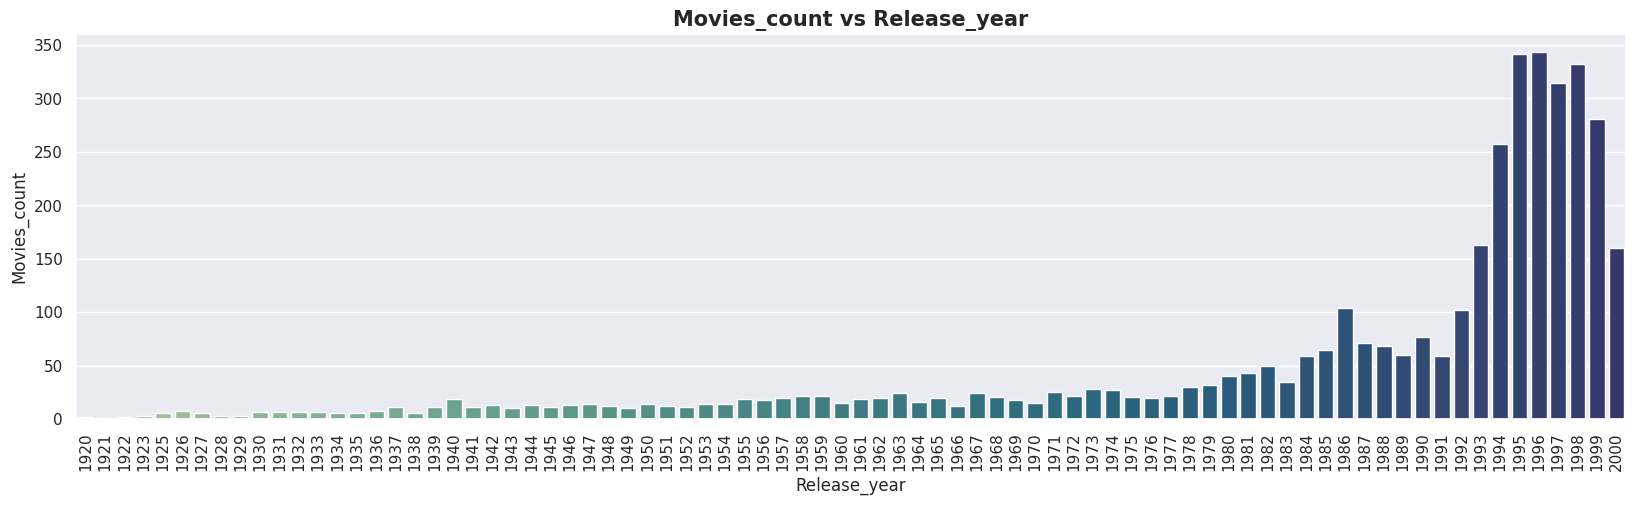

In [11]:
vc = movies['year'].value_counts()
colors = palette(np.linspace(0, 1, len(vc)))
x = vc.index
y = vc.values
sns.barplot(x=x, y=y, palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Release_year')
plt.ylabel('Movies_count')
plt.title('Movies_count vs Release_year', fontsize = 15, fontweight = 'bold')
plt.show()

In [12]:
users.head()

,0
0,UserID::Gender::Age::Occupation::Zip-code
1,1::F::1::10::48067
2,2::M::56::16::70072
3,3::M::25::15::55117
4,4::M::45::7::02460


In [13]:
users.shape

(6041, 1)

In [14]:
user_columns = users.iloc[0,0].split('::')

users = users.iloc[1:,:][0].str.split('::', expand=True)

users.columns = user_columns

users.rename(columns={'UserID' : 'u_id'}, inplace=True)

users.head()

,u_id,Gender,Age,Occupation,Zip-code
1,1,F,1,10,48067
2,2,M,56,16,70072
3,3,M,25,15,55117
4,4,M,45,7,02460
5,5,M,25,20,55455


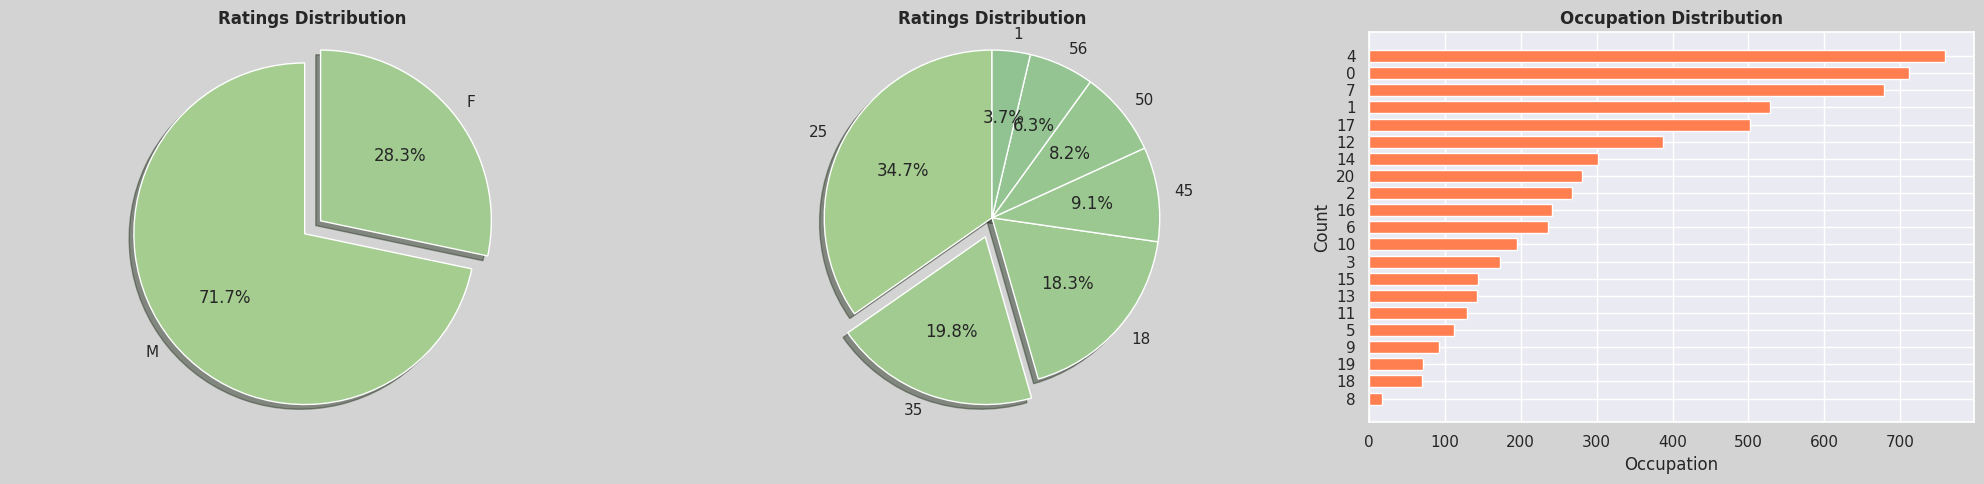

In [15]:
gc = users['Gender'].value_counts()
ac = users['Age'].value_counts()
oc = users['Occupation'].value_counts()

plt.figure(facecolor='lightgray')

plt.subplot(1, 3, 1)
plt.pie(gc, labels = gc.index,  autopct='%1.1f%%', colors = colors, shadow = True, startangle=90, explode=[0, 0.12])
plt.axis('equal')
plt.title('Ratings Distribution', weight='bold')
plt.subplot(1, 3, 2)
plt.pie(ac, labels = ac.index,  autopct='%1.1f%%', colors = colors, shadow = True, startangle=90, explode=[0, 0.12,0,0,0,0,0])
plt.axis('equal')
plt.title('Ratings Distribution', weight='bold')
plt.subplot(1, 3, 3)
plt.barh(y=oc.index, left=0, height=0.7, color='coral', width=oc.values)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution', weight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()

In [16]:
ratings.head()

,0
0,UserID::MovieID::Rating::Timestamp
1,1::1193::5::978300760
2,1::661::3::978302109
3,1::914::3::978301968
4,1::3408::4::978300275


In [17]:
ratings_columns = ratings.iloc[0,0].split('::')

ratings = ratings.iloc[1:,:][0].str.split('::', expand=True)
ratings.columns = ratings_columns
ratings.rename(columns={'UserID' : 'u_id'}, inplace=True)
ratings.head()

,u_id,MovieID,Rating,Timestamp
1,1,1193,5,978300760
2,1,661,3,978302109
3,1,914,3,978301968
4,1,3408,4,978300275
5,1,2355,5,978824291


In [18]:
ratings.shape

(1000209, 4)

In [19]:
mov_ind = movies['m_id']

ratings = ratings[ratings['MovieID'].isin(mov_ind)]

In [20]:
data = pd.DataFrame(pd.to_datetime(ratings['Timestamp'], unit='s'))

ratings['hour'] = data['Timestamp'].apply(lambda x : x.hour)
ratings['weekend'] = data['Timestamp'].apply(lambda x : 0 if x.day_of_week > 5 else 1)

In [21]:
ratings.head()

,u_id,MovieID,Rating,Timestamp,hour,weekend
1,1,1193,5,978300760,22,0
2,1,661,3,978302109,22,0
3,1,914,3,978301968,22,0
4,1,3408,4,978300275,22,0
5,1,2355,5,978824291,23,1


In [22]:
ratings.shape

(994622, 6)

<Figure size 2000x600 with 0 Axes>

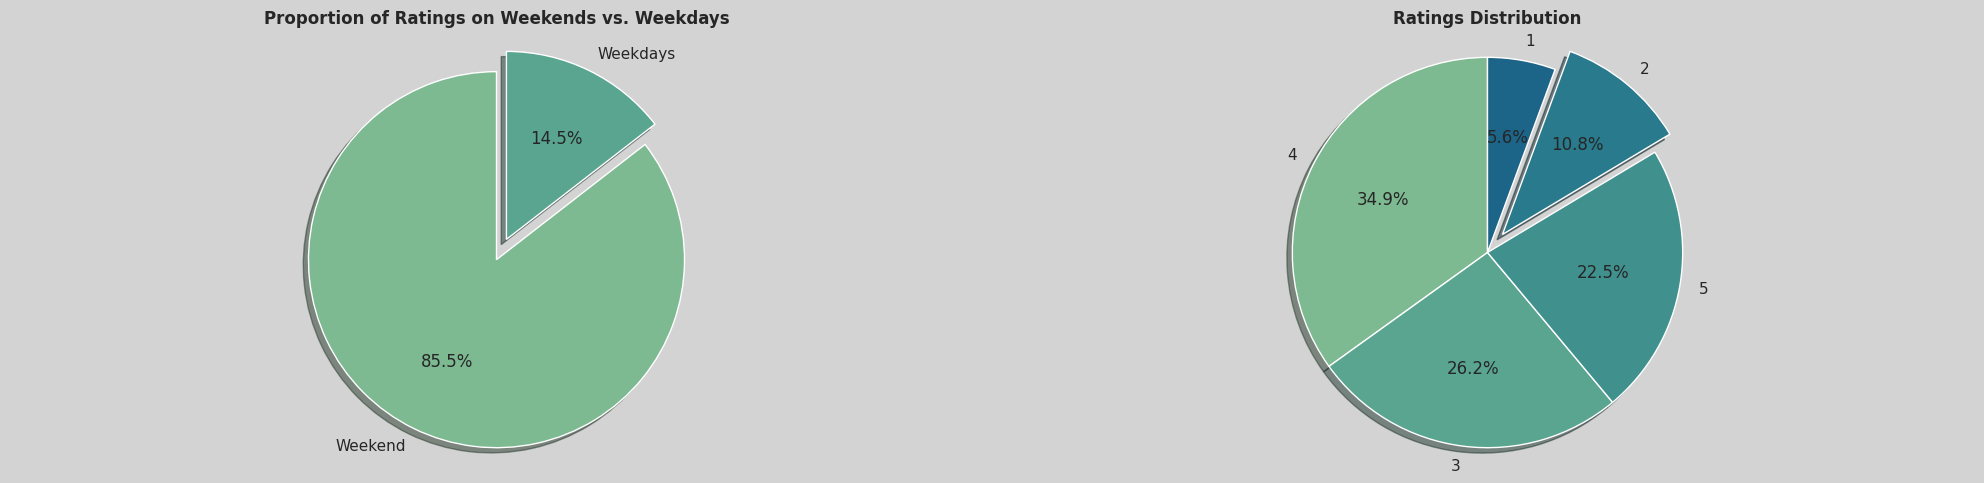

In [23]:
wc = ratings['weekend'].value_counts()

rc = ratings['Rating'].value_counts()

colors = sns.color_palette('crest')

plt.figure(figsize=(20, 6))

plt.figure(facecolor='lightgray')


plt.subplot(1, 2, 1)
plt.pie(wc, labels=['Weekend', 'Weekdays'], autopct='%1.1f%%',colors = colors, shadow = True, startangle=90, explode=[0, 0.12])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Ratings on Weekends vs. Weekdays', weight='bold')

plt.subplot(1, 2, 2)
plt.pie(rc, labels = rc.index,  autopct='%1.1f%%', colors = colors, shadow = True, startangle=90, explode=[0, 0, 0, 0.12, 0])
plt.axis('equal')
plt.title('Ratings Distribution', weight='bold')

plt.tight_layout()

plt.show()

* Movies are rated when there is a weekend.
* Can assume that 14.5% in weekdays also contains holidays.

* Taking only top 500 rated movies

In [24]:
indi = ratings['MovieID'].value_counts().head(500).index.to_list()

ratings = ratings[ratings['MovieID'].isin(indi)]

ratings.drop(columns='Timestamp', inplace=True)

ratings['Rating'] = ratings['Rating'].astype(int, errors='ignore')

avg_values = ratings.groupby('u_id').agg({'Rating':'mean', 'hour':'mean', 'weekend':'mean'}).reset_index()

cnt_rate = ratings.groupby('MovieID')['Rating'].count().reset_index()

avg_values

,u_id,Rating,hour,weekend
0,1,4.277778,22.194444,0.194444
1,10,4.208889,7.444444,0.284444
2,100,3.142857,17.269841,1.000000
3,1000,4.215385,4.076923,1.000000
4,1001,3.867769,13.148760,0.966942
...,...,...,...,...
6035,995,4.230769,19.807692,1.000000
6036,996,4.018779,11.248826,0.755869
6037,997,4.166667,2.166667,0.125000
6038,998,4.032787,21.163934,1.000000


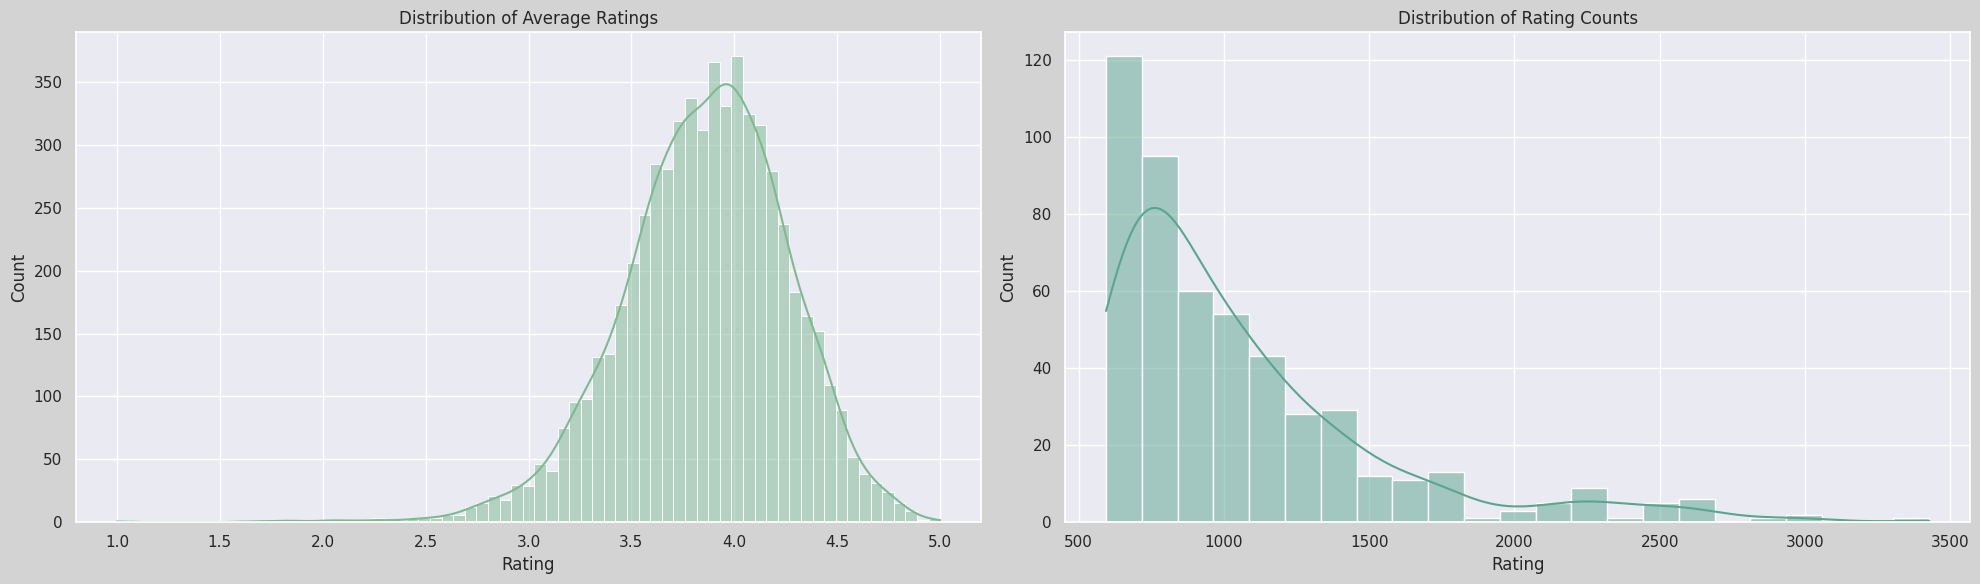

In [25]:
colors = sns.color_palette('crest')

plt.figure(figsize=(20, 6), facecolor='lightgray')

plt.subplot(1, 2, 1)
sns.histplot(avg_values['Rating'], kde=True, color=colors[0])
plt.title('Distribution of Average Ratings')

plt.subplot(1, 2, 2)
sns.histplot(cnt_rate['Rating'], kde=True, color=colors[1])
plt.title('Distribution of Rating Counts')

plt.tight_layout()

plt.show()

In [26]:
u = users.copy()

In [27]:
u = users.merge(avg_values, on='u_id')
u

,u_id,Gender,Age,Occupation,Zip-code,Rating,hour,weekend
0,1,F,1,10,48067,4.277778,22.194444,0.194444
1,2,M,56,16,70072,3.741176,21.188235,0.000000
2,3,M,25,15,55117,4.000000,21.000000,0.000000
3,4,M,45,7,02460,4.157895,20.000000,0.000000
4,5,M,25,20,55455,3.218750,5.989583,0.000000
...,...,...,...,...,...,...,...,...
6035,6036,F,25,15,32603,3.459375,4.590625,1.000000
6036,6037,F,45,1,76006,3.822034,1.652542,1.000000
6037,6038,F,56,1,14706,3.500000,9.916667,1.000000
6038,6039,F,45,0,01060,3.903846,22.307692,1.000000


In [28]:
ratings.head()

,u_id,MovieID,Rating,hour,weekend
1,1,1193,5,22,0
3,1,914,3,22,0
4,1,3408,4,22,0
5,1,2355,5,23,1
6,1,1197,3,22,0


In [29]:
u.head()

,u_id,Gender,Age,Occupation,Zip-code,Rating,hour,weekend
0,1,F,1,10,48067,4.277778,22.194444,0.194444
1,2,M,56,16,70072,3.741176,21.188235,0.000000
2,3,M,25,15,55117,4.000000,21.000000,0.000000
3,4,M,45,7,02460,4.157895,20.000000,0.000000
4,5,M,25,20,55455,3.218750,5.989583,0.000000


In [30]:
movies['Genres'] = movies['Genres'].str.split('|')

In [31]:
movies_ex = movies.explode('Genres')

In [32]:
movies_ex.head()

,m_id,Title,Genres,year
1,1,Toy Story,Animation,1995
1,1,Toy Story,Children's,1995
1,1,Toy Story,Comedy,1995
2,2,Jumanji,Adventure,1995
2,2,Jumanji,Children's,1995


In [33]:
movies_ex['Genres'].unique()

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Dram', None, 'Western', 'Chil', '', 'Fantas', 'Dr', 'D',
       'Documenta', 'Wester', 'Fant', 'Music', 'Childre', 'Childr', 'Rom',
       'Animati', 'Children', 'Come', "Children'", 'Sci-F', 'Adv',
       'Adventu', 'Horro', 'Docu', 'S', 'Sci-', 'Document', 'Th', 'Roman',
       'Documen', 'We', 'F', 'Ro', 'R', 'Sci', 'Chi', 'Thri', 'Adventur',
       'Advent', 'Roma', 'A', 'Comed', 'Com', 'Thrille', 'Wa', 'Horr'],
      dtype=object)

In [34]:
genre_mapping = {
    'Thrille': 'Thriller',
    'Thri': 'Thriller',
    'Horr': 'Horror',
    'Docu': 'Documentary',
    'Sci-': 'Sci-Fi',
    'S': 'Sci-Fi',
    'Document': 'Documentary',
    'Th': 'Thriller',
    'Roman': 'Romance',
    'Documen': 'Documentary',
    'We': 'Western',
    'F': 'Fantasy',
    'Ro': 'Romance',
    'R': 'Romance',
    'Sci': 'Sci-Fi',
    'Chi': "Children's",
    'Adventur': 'Adventure',
    'Advent': 'Adventure',
    'Acti': 'Action',
    'Roma': 'Romance',
    'Comed': 'Comedy',
    'Com': 'Comedy',
    'Wa': 'War',
    'Sci-F': 'Sci-Fi',
    'Dram' : 'Drama',
    'Adv' : 'Adventure',
    'Adventu': 'Adventure',
    'Horro' : 'Horror',
    'Dr' : 'Drama',
    '' : 'None',
    'Documenta' : 'Documentary',
    'D' : 'Drama',
    'Wester' : 'Western',
    'Fant' : 'Fantasy',
    'Childre' : 'Children',
    'Childr' : 'Children',
    'Rom' : 'Romance',
    'Animati' : 'Animation',
    'Come' : 'Comedy',
    "Children'" : 'Children',
    "Children's" : 'Children',
    'Chil' : 'Children',
    None : 'None',
    'Fantas' : 'Fantasy',
    "Children's " : 'Children'
}

In [35]:
movies_ex['Genres'] = movies_ex['Genres'].replace(genre_mapping)

In [36]:
movies_ex['Genres'] = movies_ex['Genres'].replace(genre_mapping)

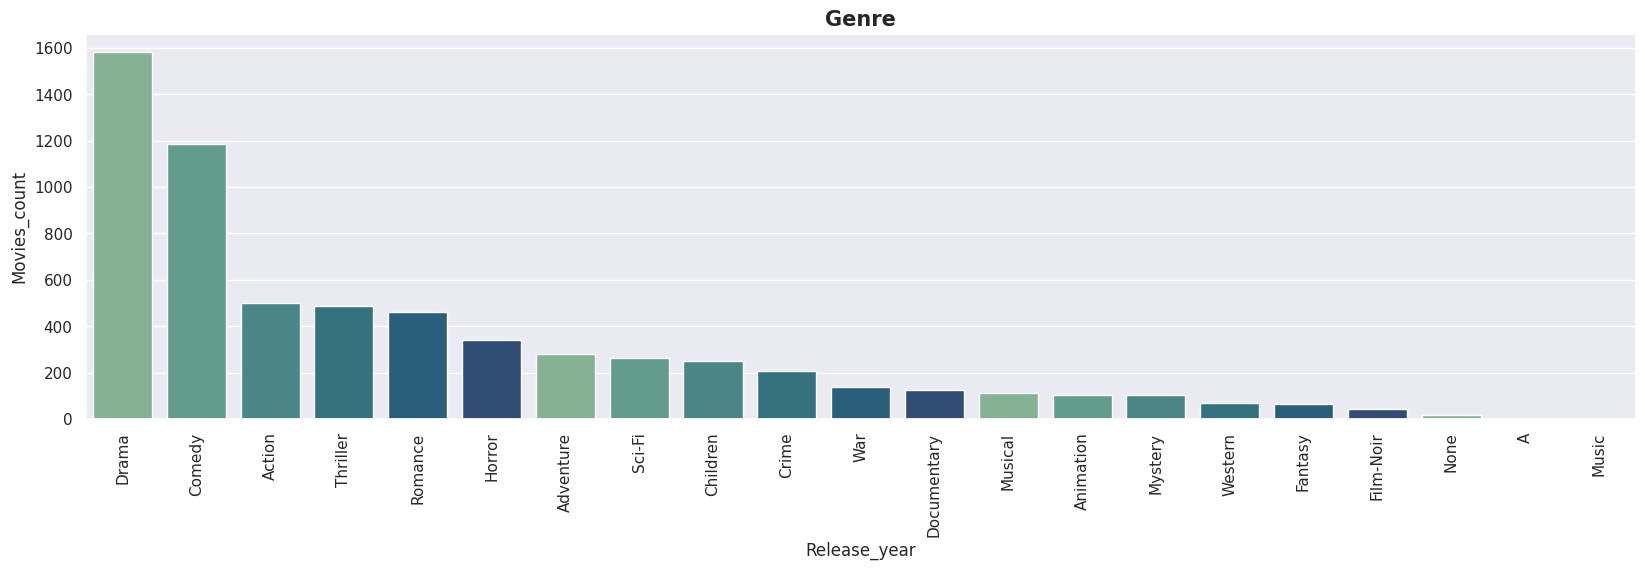

In [37]:
vc = movies_ex['Genres'].value_counts()

x = vc.index

y = vc.values

sns.barplot(x=x, y=y, palette=colors)
plt.xticks(rotation=90)
plt.xlabel('Release_year')
plt.ylabel('Movies_count')
plt.title('Genre', fontsize = 15, fontweight = 'bold')
plt.show()

* Can delete A and Music

In [38]:
movies_ex = movies_ex[~movies_ex['Genres'].isin(['A', 'Music'])]

In [39]:

movies_piv = movies_ex.pivot_table(index='m_id', columns='Genres', values='Title', aggfunc=lambda x: ' '.join(str(v) for v in x)).fillna(0)

movies_piv[movies_piv!=0] = 1

movies_piv.head()

Genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,None,Romance,Sci-Fi,Thriller,War,Western
m_id,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Pearson Correlation Recommendation

In [40]:
r = ratings.copy()

r = r.merge(movies, left_on = 'MovieID', right_on = 'm_id').iloc[:,[0,2,6]]

r = r.pivot_table(index='u_id', columns='Title', values='Rating').fillna(0)

In [41]:
recommedations = 20
movie_samp = np.random.choice(r.columns, recommedations)

user_samp = np.random.choice(r.index, recommedations)

user_movie = r[r.index.isin(user_samp)][movie_samp]

<Axes: xlabel='Title', ylabel='Title'>

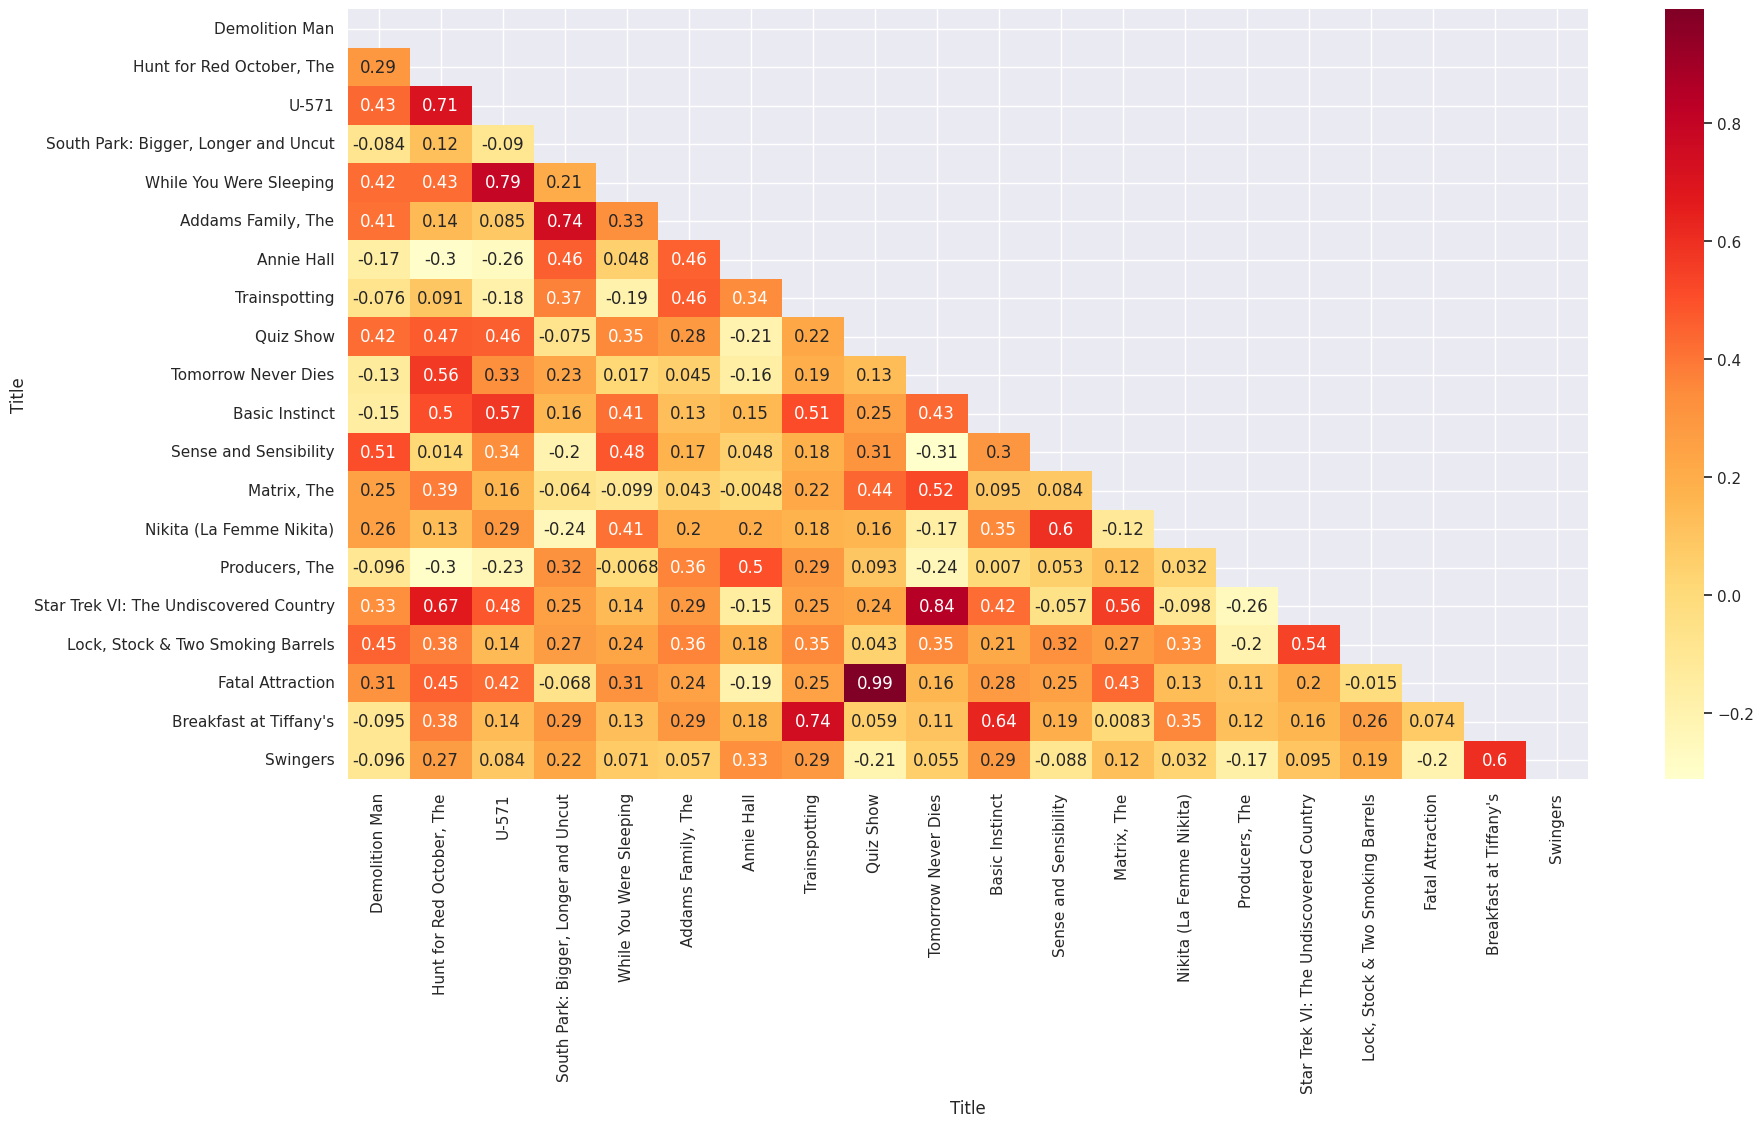

In [42]:
plt.figure(figsize=(20,10))
mask = np.triu(user_movie.corr())
sns.heatmap(user_movie.corr(), annot = True, cmap = 'YlOrRd',  mask = mask)

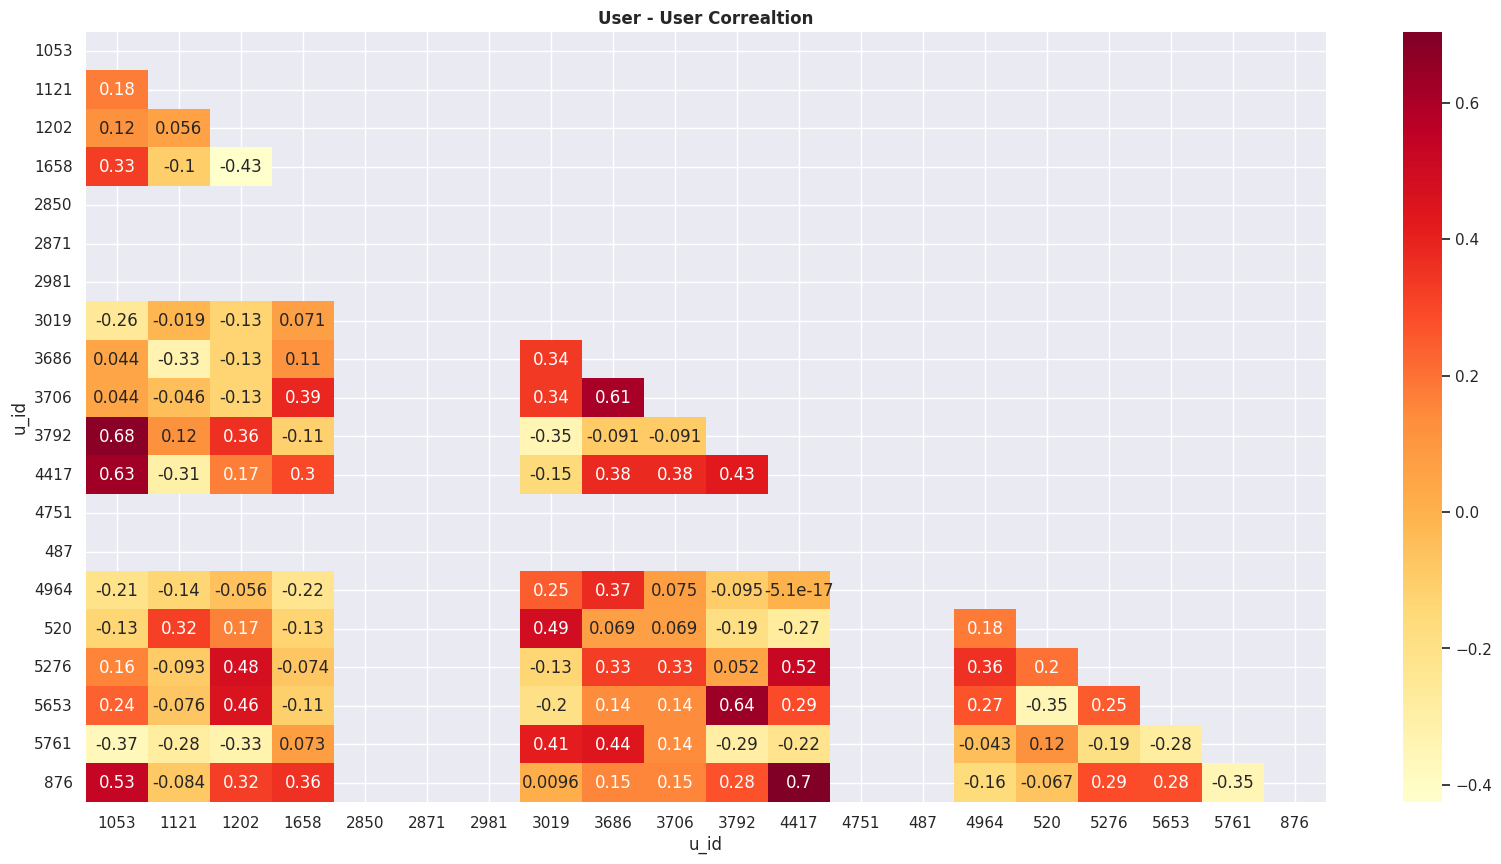

In [43]:
plt.figure(figsize=(20,10))
mask = np.triu(user_movie.T.corr())
sns.heatmap(user_movie.T.corr(), annot = True, cmap = 'YlOrRd',  mask = mask)
plt.yticks(rotation=0)
plt.title('User - User Correaltion', weight = 'bold')
plt.show()

In [44]:
def pearson_rec(r, movie_name, recommedations):
    corrs = pd.DataFrame(r.corrwith(r[movie_name]), columns= ['Corr'])
    rec_movies = corrs.sort_values(by='Corr', ascending=False).head(recommedations + 1)
    print('-'*100)
    print('\n')
    print(f'For movie - |{movie_name}| here are {recommedations} recommendations')
    print('-'*100)

    [print(i) for i in list(rec_movies.index[1:])]

In [45]:
movie_name = np.random.choice(r.T.index.to_list(),1)[0]
movie_name

'Seven (Se7en)'

In [46]:
pearson_rec(r, movie_name, 10)

----------------------------------------------------------------------------------------------------


For movie - |Seven (Se7en)| here are 10 recommendations
----------------------------------------------------------------------------------------------------
Reservoir Dogs
Usual Suspects, The
Simple Plan, A
Game, The
Heat
Pulp Fiction
Jackie Brown
Casino
Wild Things
Cape Fear


Cosine Similarity

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(r)

In [48]:
user_user_sim = pd.DataFrame(cos_sim, columns = r.index)
user_user_sim

u_id,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.323100,0.156955,0.232644,0.187828,0.148339,0.153491,0.212948,0.124291,0.075313,...,0.110568,0.060779,0.052296,0.103620,0.097031,0.054389,0.233622,0.179158,0.200661,0.199912
1,0.323100,1.000000,0.344850,0.358351,0.295710,0.165967,0.181665,0.560766,0.260290,0.152988,...,0.225324,0.244160,0.138395,0.185729,0.179508,0.202022,0.439702,0.205089,0.238872,0.367248
2,0.156955,0.344850,1.000000,0.353837,0.123493,0.132846,0.405709,0.311750,0.203488,0.126464,...,0.122415,0.139966,0.094839,0.220184,0.336153,0.038888,0.395533,0.231268,0.182912,0.390235
3,0.232644,0.358351,0.353837,1.000000,0.168186,0.060214,0.239588,0.444709,0.402899,0.175058,...,0.196015,0.115201,0.000000,0.288314,0.455566,0.063486,0.426465,0.205402,0.152170,0.367343
4,0.187828,0.295710,0.123493,0.168186,1.000000,0.248670,0.096593,0.273200,0.233929,0.217595,...,0.262863,0.060895,0.138316,0.157885,0.128493,0.149116,0.377159,0.163051,0.435166,0.300756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,0.054389,0.202022,0.038888,0.063486,0.149116,0.104948,0.042707,0.136094,0.086961,0.049477,...,0.120690,0.349094,0.111314,0.095798,0.072468,1.000000,0.094370,0.026482,0.146890,0.041554
6036,0.233622,0.439702,0.395533,0.426465,0.377159,0.286533,0.227159,0.463355,0.360330,0.190571,...,0.268797,0.127304,0.098679,0.260699,0.283552,0.094370,1.000000,0.213716,0.281333,0.565357
6037,0.179158,0.205089,0.231268,0.205402,0.163051,0.082927,0.193067,0.229713,0.125071,0.063155,...,0.233832,0.043686,0.118404,0.222759,0.137038,0.026482,0.213716,1.000000,0.300475,0.230830
6038,0.200661,0.238872,0.182912,0.152170,0.435166,0.297013,0.199158,0.137033,0.170933,0.095997,...,0.108573,0.130012,0.111565,0.236603,0.032890,0.146890,0.281333,0.300475,1.000000,0.200541


In [49]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim1 = cosine_similarity(r.T)


item_item_sim = pd.DataFrame(cos_sim1, columns=r.columns)

item_item_sim

Title,10 Things I Hate About You,12 Angry Men,"13th Warrior, The","Abyss, The",Ace Ventura: Pet Detective,"Addams Family, The","Adventures of Buckaroo Bonzai Across the 8th Dimension, Th","African Queen, The",Air Force One,Airplane!,...,Willow,Willy Wonka and the Chocolate Factory,Witness,"Wizard of Oz, The","World Is Not Enough, The","Wrong Trousers, The","X-Files: Fight the Future, The",X-Men,You've Got Mail,Young Frankenstein
0,1.000000,0.152429,0.268432,0.289500,0.272870,0.260554,0.138175,0.124412,0.221087,0.236583,...,0.228656,0.253772,0.172834,0.218717,0.222252,0.170959,0.214942,0.277378,0.295243,0.176951
1,0.152429,1.000000,0.145423,0.229524,0.206744,0.229287,0.195951,0.327090,0.207687,0.294242,...,0.153738,0.237809,0.306057,0.358333,0.147478,0.185937,0.199621,0.181543,0.170438,0.289950
2,0.268432,0.145423,1.000000,0.391873,0.221277,0.243515,0.229959,0.162057,0.329661,0.207628,...,0.329405,0.248028,0.173120,0.207759,0.293437,0.144430,0.272780,0.333459,0.183878,0.196112
3,0.289500,0.229524,0.391873,1.000000,0.295062,0.325227,0.392332,0.308388,0.406385,0.398380,...,0.444132,0.400414,0.347601,0.372634,0.339218,0.263387,0.432712,0.428152,0.251272,0.356075
4,0.272870,0.206744,0.221277,0.295062,1.000000,0.492258,0.218543,0.195363,0.366290,0.369748,...,0.271218,0.326940,0.225894,0.289969,0.278198,0.213926,0.275590,0.269965,0.370905,0.269457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.170959,0.185937,0.144430,0.263387,0.213926,0.264275,0.245738,0.229582,0.171187,0.325222,...,0.258489,0.316264,0.240999,0.344169,0.200979,1.000000,0.237036,0.276337,0.178982,0.346701
496,0.214942,0.199621,0.272780,0.432712,0.275590,0.291181,0.339563,0.204220,0.359087,0.330993,...,0.338338,0.355033,0.287704,0.309282,0.306039,0.237036,1.000000,0.396194,0.229432,0.303031
497,0.277378,0.181543,0.333459,0.428152,0.269965,0.276434,0.260167,0.189504,0.319115,0.346396,...,0.339763,0.345475,0.218938,0.302514,0.320302,0.276337,0.396194,1.000000,0.221011,0.286264
498,0.295243,0.170438,0.183878,0.251272,0.370905,0.356814,0.173147,0.204846,0.329709,0.287648,...,0.237592,0.315523,0.305784,0.308029,0.280169,0.178982,0.229432,0.221011,1.000000,0.235817


In [50]:
def cosine_similarity_rec(movie, count, r, item_item_sim):
    if movie not in r.columns:
        print('Movie not found')

        return []
    item_item_sim = item_item_sim.set_index(r.columns)
    movies = movies = item_item_sim[movie].sort_values(ascending = False).index[1:count+1]

    if len(movies) > 0:
        print('-'*100)
        print('\n')
        print(f'For movie - |{movie}| here are {count} recommendations')
        print('-'*100)

        [print(i) for i in movies]

In [51]:
for i in range(5):
    movie_name = np.random.choice(r.T.index.to_list(),1)[0]
    cosine_similarity_rec(movie_name, 5, r, item_item_sim)


----------------------------------------------------------------------------------------------------


For movie - |Lost in Space| here are 5 recommendations
----------------------------------------------------------------------------------------------------
Stargate
Deep Impact
Armageddon
Lost World: Jurassic Park, The
Independence Day (ID4)
----------------------------------------------------------------------------------------------------


For movie - |Rock, The| here are 5 recommendations
----------------------------------------------------------------------------------------------------
Clear and Present Danger
Con Air
Die Hard 2
True Lies
Speed
----------------------------------------------------------------------------------------------------


For movie - |Pretty in Pink| here are 5 recommendations
----------------------------------------------------------------------------------------------------
Sixteen Candles
Splash
Breakfast Club, The
Mr. Mom
Parenthood
------------------

* Recommender using KNN

In [52]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(metric='cosine')

nn.fit(r.T)

distance,neighbors = nn.kneighbors([r.loc[:,movie_name]],n_neighbors=6)

recommended_movies = [r.T.iloc[i].name for i in neighbors[0]]

print('-'*100)
print(f'For movie - |{movie_name}| here are {5} recommendations')
print('-'*100)
for mov in recommended_movies:
    if mov != movie_name:
        print(mov)

----------------------------------------------------------------------------------------------------
For movie - |Taxi Driver| here are 5 recommendations
----------------------------------------------------------------------------------------------------
Godfather, The
Apocalypse Now
Godfather: Part II, The
Raging Bull
Fargo


In [53]:
!pip install cmfrec

In [54]:
ratings.head(1)

,u_id,MovieID,Rating,hour,weekend
1,1,1193,5,22,0


In [55]:
from cmfrec import CMF

d = 4

rm_raw = ratings[['u_id', 'MovieID', 'Rating']].copy()

rm_raw.rename(columns={'u_id': 'UserId', 'MovieID': 'ItemId'}, inplace=True)

model = CMF(method = 'als', k=4, lambda_ = 0.1, user_bias = False, item_bias = False, verbose = False)

model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [56]:
model.A_

array([[-0.13415593, -0.01643893, -0.14038399,  0.10958991],
       [ 0.07489844,  0.02137796, -0.40912133, -0.04536336],
       [-0.13883172, -0.05350524, -0.11377744, -0.09715611],
       ...,
       [ 0.3205198 ,  0.03572091, -0.2438348 , -0.14114471],
       [ 0.11760037, -0.01795933, -0.25405622, -0.08962334],
       [ 0.20932287, -0.1390902 ,  0.04959507, -0.27193657]],
      dtype=float32)

In [57]:
model.B_

array([[-0.02008407, -4.0934634 , -1.4504912 , -0.01003234],
       [ 1.6786603 , -1.1762897 , -2.0000503 ,  2.8137982 ],
       [-0.03577873,  0.20688944, -1.6321648 ,  2.2589552 ],
       ...,
       [-2.921031  ,  2.1312819 , -0.32464364,  2.3133657 ],
       [ 2.0239928 , -3.1469083 ,  1.7504475 ,  1.7386578 ],
       [-0.17309774, -3.9095488 ,  1.7474937 ,  0.67779344]],
      dtype=float32)

In [ ]:
model.topN(user = 1, n = 10)

In [ ]:
X = ratings[['u_id', 'MovieID', 'Rating']].copy()

X = X.merge(u.reset_index(), on='u_id', how='right')

movies_piv.fillna(0, inplace=True)

movies_piv = movies_piv[movies_piv.index.isin(indi)]

X = X.merge(movies_piv.reset_index(), left_on='MovieID', right_on='m_id', how='right')

In [ ]:
X = X.drop(columns=['index','m_id', 'u_id', 'MovieID'])

X.rename(columns={'Rating_x' : 'Rating', 'Rating_y': 'Avg_Rating'}, inplace = True)

In [ ]:
y = X.pop('Rating')

In [ ]:
X.dtypes

Gender          object
Age             object
Occupation      object
Zip-code        object
Avg_Rating     float64
hour           float64
weekend        float64
Action          object
Adventure       object
Animation       object
Children        object
Comedy          object
Crime           object
Documentary     object
Drama           object
Fantasy         object
Film-Noir       object
Horror          object
Musical         object
Mystery         object
None            object
Romance         object
Sci-Fi          object
Thriller        object
War             object
Western         object
dtype: object

In [ ]:
X = X.replace({True:1, False:0})

In [ ]:
cats = X.iloc[:,:4].copy()

for col in cats.columns:
    dict_ = ((cats[col].value_counts())/len(X)).to_dict()

    cats[col] = cats[col].map(dict_)
    X[col] = cats[col]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CSR Implementatiion

In [ ]:
from scipy import sparse

X_train_csr = sparse.csr_matrix(X_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

x_train_csr_scaled = scaler.fit_transform(X_train_csr)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train, X_test)

x_test_scaled = scaler.transform(X_test)


In [ ]:
x_train_scaled.shape, x_test_scaled.shape

((422551, 26), (105638, 26))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mean_squared_error(y_test, y_pred)**0.5

0.9397764021329948

In [ ]:
X.corr(method='pearson')

,Gender,Age,Occupation,Zip-code,Avg_Rating,hour,weekend,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,None,Romance,Sci-Fi,Thriller,War,Western
Gender,1.000000,0.035811,0.033098,-0.001003,-0.005275,0.007217,0.059695,0.085398,0.038038,-0.022279,...,0.007949,0.018748,-0.036701,-0.000339,-0.009445,-0.078568,0.068932,0.037136,0.014433,0.012547
Age,0.035811,1.000000,0.083568,0.143304,-0.052971,0.022579,0.054689,0.012275,0.000877,-0.004125,...,-0.011993,0.006742,-0.012904,-0.007444,-0.001130,-0.009436,0.011718,0.013061,-0.024191,-0.014030
Occupation,0.033098,0.083568,1.000000,0.095603,-0.026116,-0.007107,0.033716,0.012646,0.001519,0.000109,...,-0.007754,0.001975,-0.005987,-0.001734,-0.003091,-0.005319,0.001307,0.009708,-0.003688,-0.004510
Zip-code,-0.001003,0.143304,0.095603,1.000000,-0.091291,0.048124,0.076350,-0.022038,-0.015066,-0.005912,...,-0.000691,-0.008387,0.003541,0.003953,0.004101,0.011762,-0.014499,-0.008338,-0.014661,-0.004661
Avg_Rating,-0.005275,-0.052971,-0.026116,-0.091291,1.000000,0.010739,-0.029013,-0.016843,-0.012451,0.006414,...,0.015279,-0.009601,0.003320,0.002887,-0.000106,-0.004639,-0.024264,-0.008534,0.019119,-0.000278
hour,0.007217,0.022579,-0.007107,0.048124,0.010739,1.000000,0.038698,-0.005806,-0.003345,0.000536,...,-0.000675,-0.005453,0.000970,-0.000809,-0.002082,0.000189,-0.006070,-0.005936,-0.001047,-0.003474
weekend,0.059695,0.054689,0.033716,0.076350,-0.029013,0.038698,1.000000,-0.005566,-0.006503,0.000601,...,0.001664,-0.000977,-0.001771,0.002716,-0.001903,0.001164,-0.007035,0.001249,-0.002473,0.002482
Action,0.085398,0.012275,0.012646,-0.022038,-0.016843,-0.005806,-0.005566,1.000000,0.437340,-0.138564,...,-0.107846,-0.000024,-0.125009,-0.089645,-0.037428,-0.099313,0.308602,0.236041,0.072374,0.032115
Adventure,0.038038,0.000877,0.001519,-0.015066,-0.012451,-0.003345,-0.006503,0.437340,1.000000,-0.034887,...,-0.006338,-0.038660,-0.053147,-0.047459,-0.023681,-0.064993,0.192136,-0.067114,-0.063793,-0.011285
Animation,-0.022279,-0.004125,0.000109,-0.005912,0.006414,0.000536,0.000601,-0.138564,-0.034887,1.000000,...,0.088431,-0.030610,0.323116,-0.039588,-0.010588,-0.038800,-0.085399,-0.095415,-0.059741,-0.028709
